Augmenting image CandidateDataSet1\IMG_20170128_134143_Candidate_4.jpg


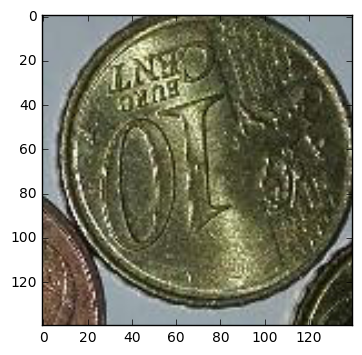

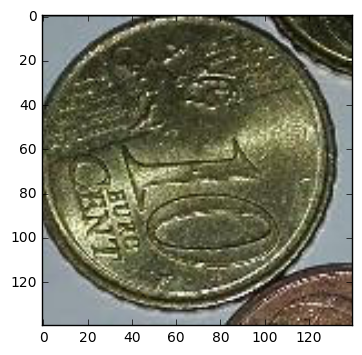

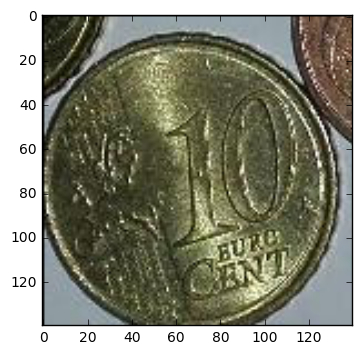

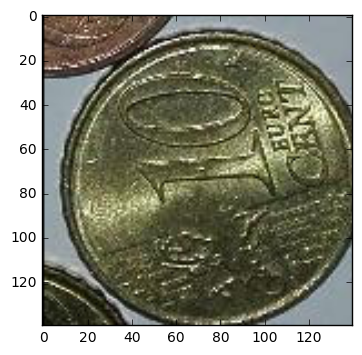

In [1]:
from PIL import Image;
import numpy as np;
import scipy as sci;
import csv;
import cv2;
import matplotlib.pyplot as plt;
import pandas as pd;
import glob

import time

def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)
    
inputDir = 'CandidateDataSet1\\'
#input_file = glob.glob(inputDir+"*.jpg")
input_file = [inputDir+"IMG_20170128_134143_Candidate_4.jpg"]  #For debugging

outputDir = 'CandidateDataSet1\\Augmented\\'
angles = [0,90,180,270]

for kfile in input_file:
    tic()
    print("Augmenting image "+str(kfile))
    im = Image.open(kfile)
    imarray = np.array(im)
    
    for kAngle in angles:
        M = cv2.getRotationMatrix2D((imarray.shape[1]/2,imarray.shape[0]/2),kAngle,1)
        rotated_image = cv2.warpAffine(imarray,M,(imarray.shape[1],imarray.shape[0]))
        plt.imshow(rotated_image)
        plt.show()
        fileNamek = kfile.split("\\")[1]
        output_filename = outputDir+fileNamek.split(".")[0]+"_Aug_"+str(kAngle)+".jpg"
        img = Image.fromarray(rotated_image, 'RGB')
        img.save(output_filename)
    

# Labeling Data


In [9]:
def readLabels(inputDir):
    #Reads the .csv files in order to initialize the data
    
    #For the train set
    fileName = inputDir + 'labels.csv'
    
    dfLabels = pd.read_csv(fileName)
    
    return dfLabels

dfLabels = readLabels(inputDir)
dfLabelsAug = pd.DataFrame();

for kName in range(0,len(dfLabels)):
    fileNameRoot = dfLabels.iloc[kName,0]
    fileNameRoot = fileNameRoot.split('.')[0]
    fileName0 = fileNameRoot + '_Aug_0.jpg'
    fileName90 = fileNameRoot + '_Aug_90.jpg'
    fileName180 = fileNameRoot + '_Aug_180.jpg'
    fileName270 = fileNameRoot + '_Aug_270.jpg'
    fileNameAug = [fileName0,fileName90,fileName180,fileName270]
    CoinorNoCoinAug = [dfLabels.iloc[kName,1],dfLabels.iloc[kName,1],dfLabels.iloc[kName,1],dfLabels.iloc[kName,1]]
    GroupAug = [dfLabels.iloc[kName,2],dfLabels.iloc[kName,2],dfLabels.iloc[kName,2],dfLabels.iloc[kName,2]]
    CoinTypeAug = [dfLabels.iloc[kName,3],dfLabels.iloc[kName,3],dfLabels.iloc[kName,3],dfLabels.iloc[kName,3]]
    dfLabelsAugk = pd.DataFrame();
    dfLabelsAugk['FileName']=fileNameAug
    dfLabelsAugk['CoinorNoCoin']=CoinorNoCoinAug
    dfLabelsAugk['Group']=GroupAug
    dfLabelsAugk['CoinType']=CoinTypeAug
    dfLabelsAug = dfLabelsAug.append(dfLabelsAugk)

In [11]:
dfLabelsAug.to_csv(path_or_buf='labelsaug.csv',index=False)